<center>

# Hypothesis Testing

</center>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Normal Distribution

$X \sim \mathcal{N}(\mu, \sigma^2)$


$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$


In [2]:
dt_n = 20000
x = np.linspace(-100, 100, dt_n)
mean, var = 10, 50
y = (1/np.sqrt(2 * np.pi * var)) * np.exp(-(x - mean)**2/(2 * var))

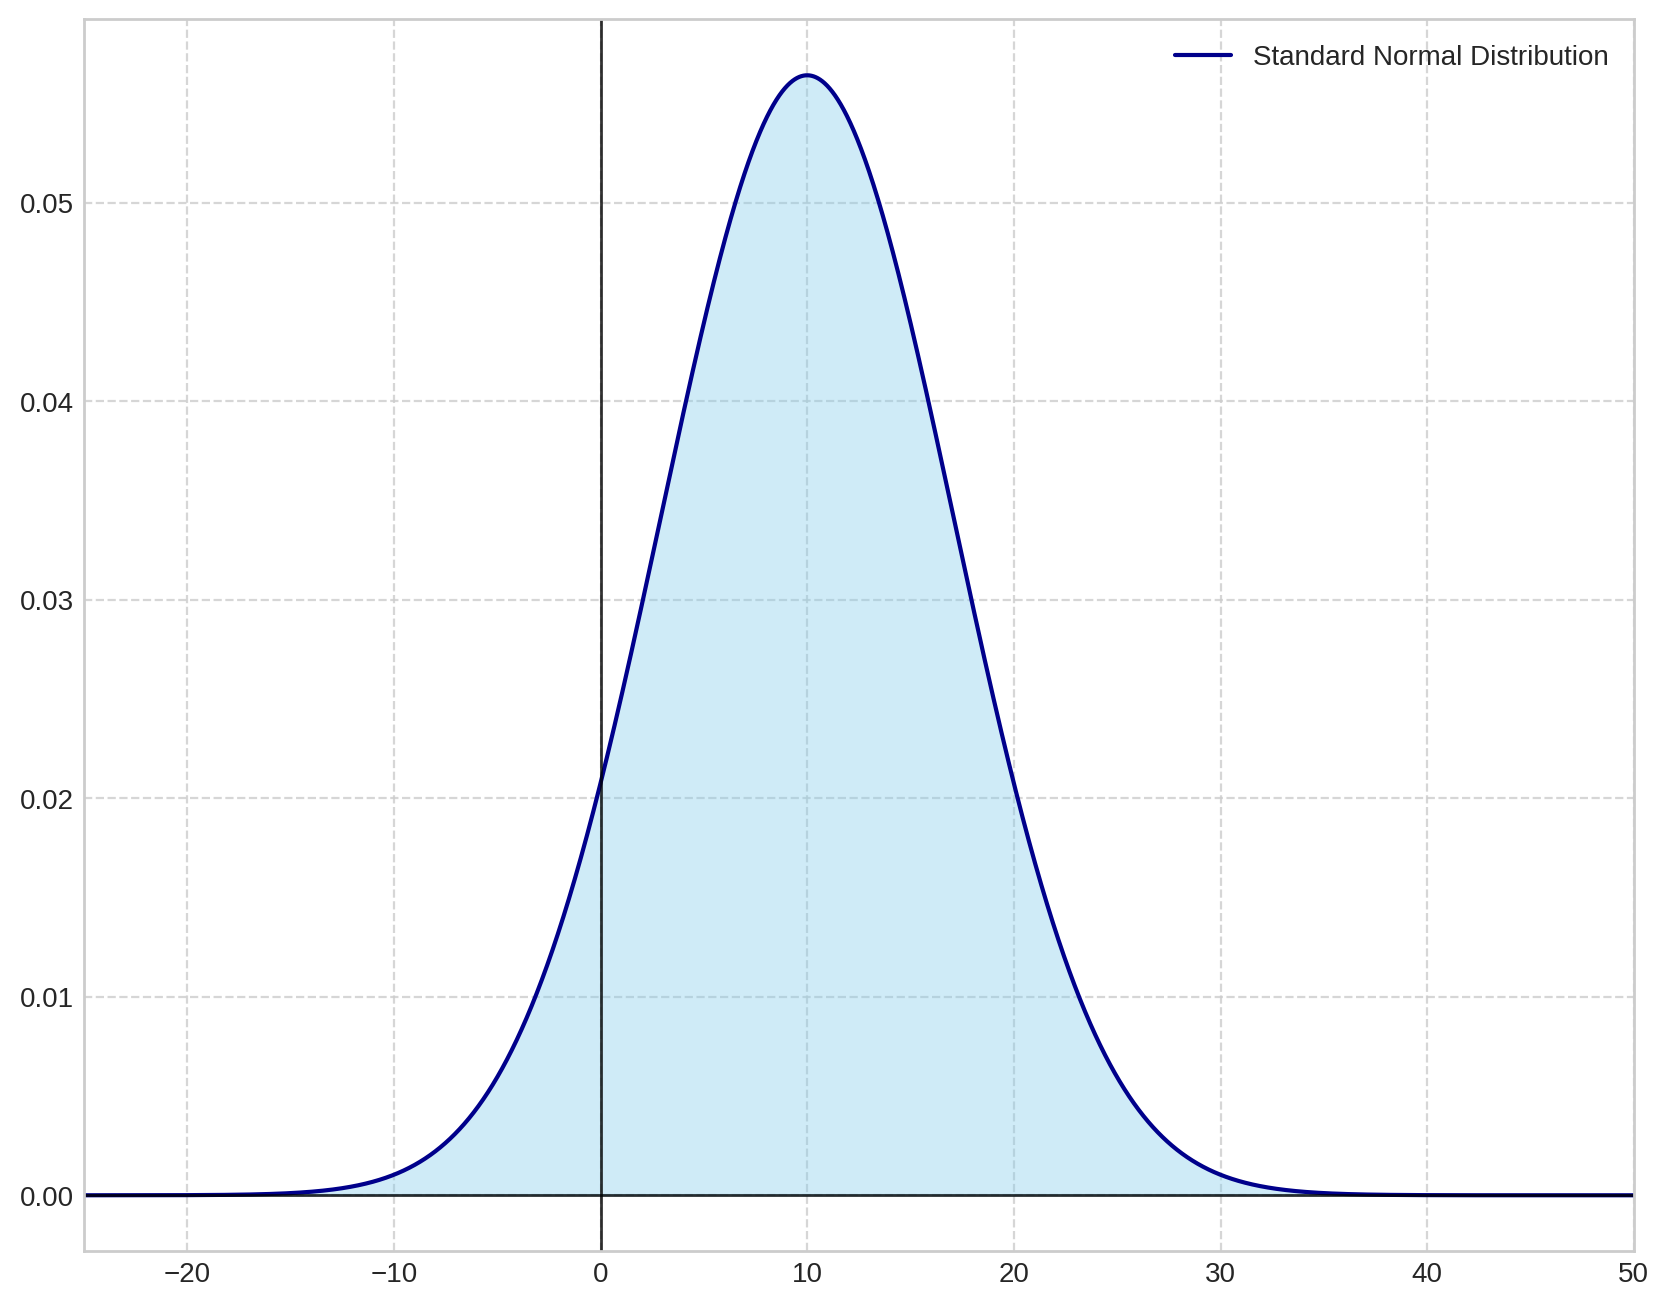

In [3]:
plt.style.use("seaborn-v0_8-whitegrid")
dpi=200
plt.figure(figsize=(10, 8), dpi=dpi)
plt.plot(x, y, color="darkblue", label="Standard Normal Distribution")
plt.fill_between(x, y, color="skyblue", alpha=0.4)
plt.axhline(0, color='black', linewidth=1, alpha=0.8)
plt.axvline(0, color='black', linewidth=1, alpha=0.8)
plt.xlim((-25, 50))
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

## Standard Normal Distribution

$Z \sim \mathcal{N}(0, 1)$
$$
\phi(z) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{z^2}{2} \right)
$$


In [4]:
dt_n = 20000
x = np.linspace(-100, 100, dt_n)
mean, var = 0, 1
y = (1/np.sqrt(2 * np.pi * var)) * np.exp(-(x - mean)**2/(2 * var))

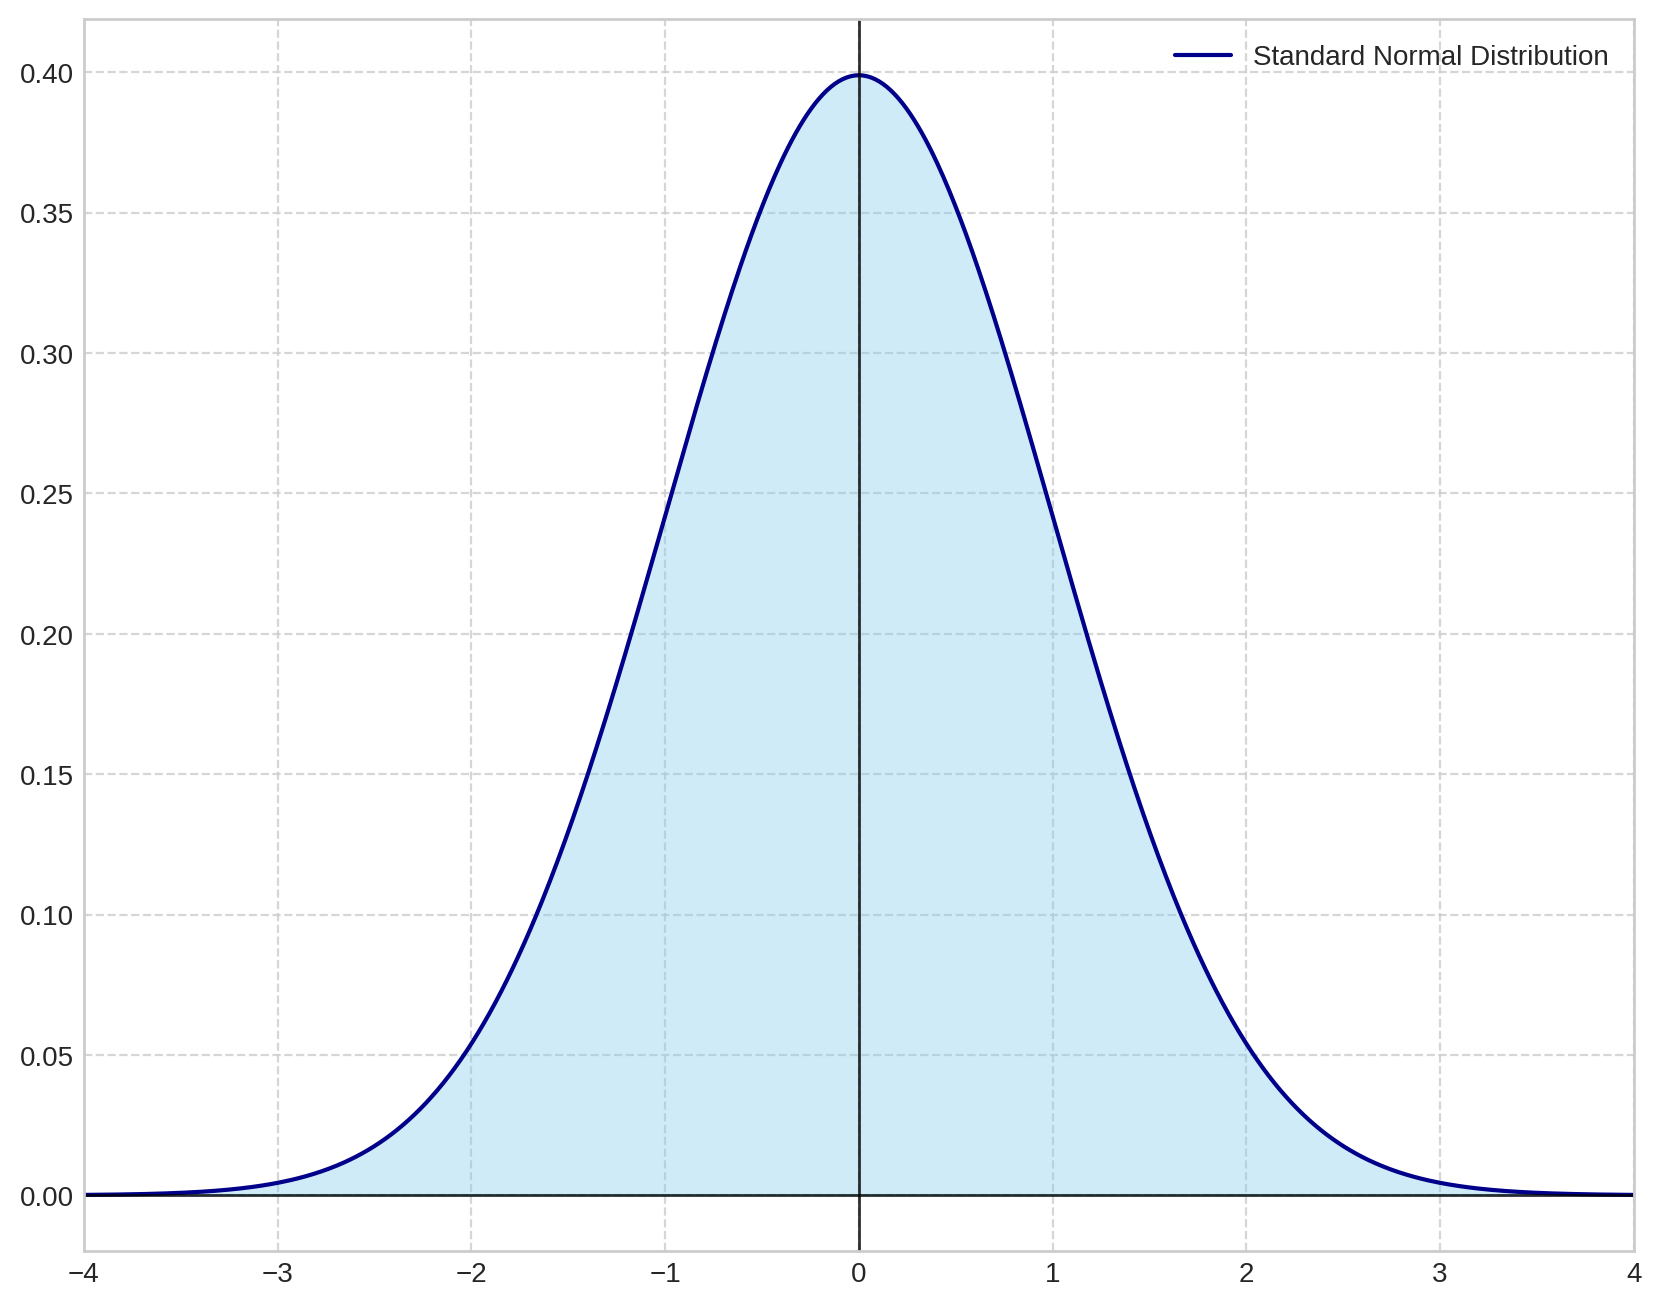

In [5]:
plt.style.use("seaborn-v0_8-whitegrid")
dpi=200
plt.figure(figsize=(10, 8), dpi=dpi)
plt.plot(x, y, color="darkblue", label="Standard Normal Distribution")
plt.fill_between(x, y, color="skyblue", alpha=0.4)
plt.axhline(0, color='black', linewidth=1, alpha=0.8)
plt.axvline(0, color='black', linewidth=1, alpha=0.8)
plt.xlim((-4, 4))
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

## Cumulative Distribution Function

$$
\Phi(z) = \int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{t^2}{2} \right) dt
$$


In [6]:
def integrate_normal(x, y):
    dx = x[1] - x[0]
    cdf = np.zeros(len(x))
    sum = 0
    for i in range(len(y)):
        sum += (y[i] * dx)
        cdf[i] = sum
    z_table = np.column_stack((x, cdf))
    return cdf, z_table

cdf, z_table = integrate_normal(x, y)
z_table = pd.DataFrame(z_table, columns=["X-Axis", "Z Scores"])
z_table.to_csv("Z-Table.csv", index=False)
display(z_table)

,X-Axis,Z Scores
0,-100.000000,0.0
1,-99.989999,0.0
2,-99.979999,0.0
3,-99.969998,0.0
4,-99.959998,0.0
...,...,...
19995,99.959998,1.0
19996,99.969998,1.0
19997,99.979999,1.0
19998,99.989999,1.0


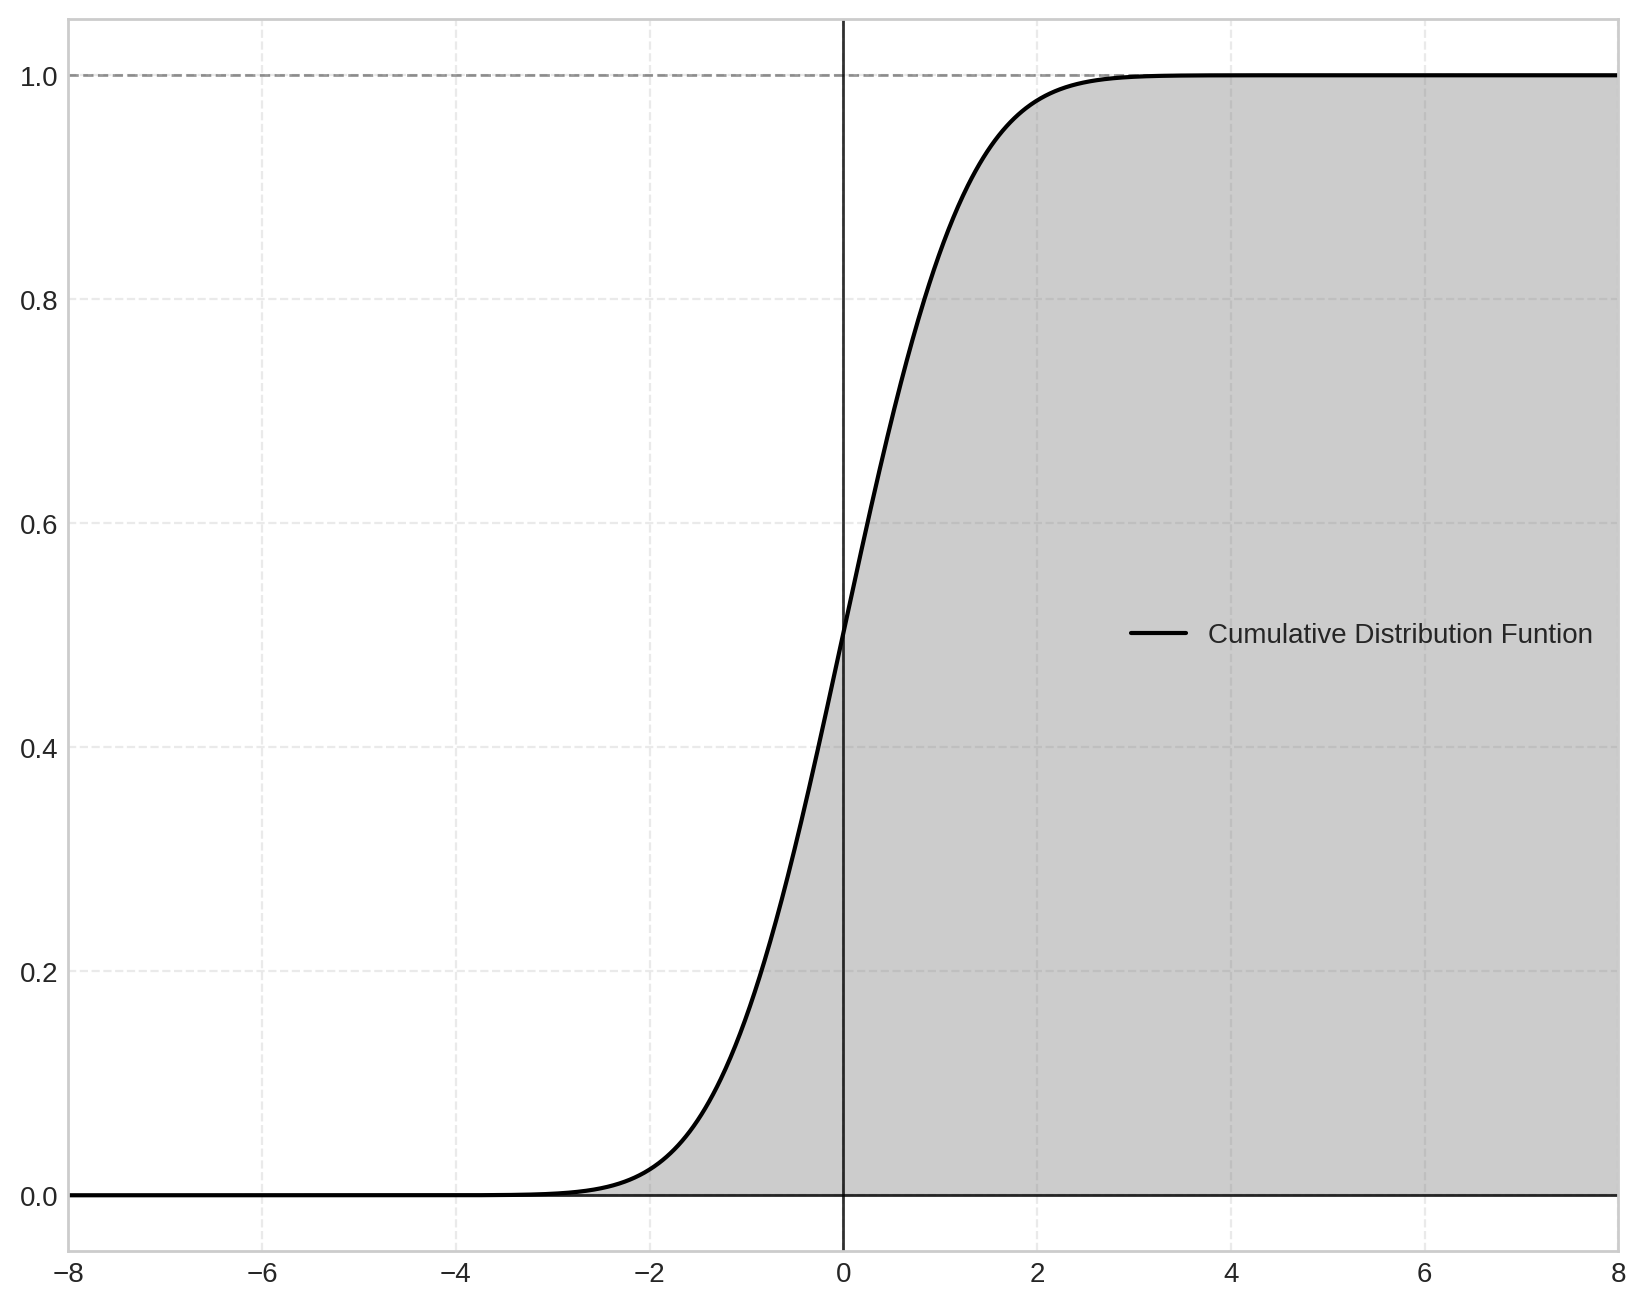

In [7]:
plt.figure(figsize=(10, 8), dpi=dpi)
plt.plot(x, cdf, color="black", label="Cumulative Distribution Funtion")
plt.axhline(0, color='black', linewidth=1, alpha=0.8)
plt.axvline(0, color='black', linewidth=1, alpha=0.8)
plt.axhline(1, color='black', linewidth=1, linestyle="--", alpha=0.4)
plt.fill_between(x, cdf, color="gray", alpha=0.4)
plt.xlim((-8, 8))
plt.legend()
plt.grid(linestyle="--", alpha=0.4)
plt.show()

## Calculation Of Z-Scores and Z Scores Table

In [8]:
def integrate_interval_one_tailed(x, y, confidence_level):
    dx = x[1] - x[0]
    sum = 0
    for i in range(len(y)):
        sum += (y[i] * dx)
        if sum >=(confidence_level)/100:
            return x[i]

def integrate_interval_two_tailed(x, y, confidence_level):
    dx = x[1] - x[0]
    sum = 0
    for i in range(int(len(y)/2), len(y), 1):
        sum += (y[i] * dx)
        if sum >=(confidence_level/2)/100:
            return x[i]

z_scores_for_one_tailed_test, z_scores_for_two_tailed_test = [], []
confidence_levels = [80, 85, 90, 95, 98, 99, 99.5, 99.9]
for cl in confidence_levels:
    z_scores_for_one_tailed_test.append(integrate_interval_one_tailed(x, y, cl))
    z_scores_for_two_tailed_test.append(integrate_interval_two_tailed(x, y, cl))

## Plotting The Confidence Intervals

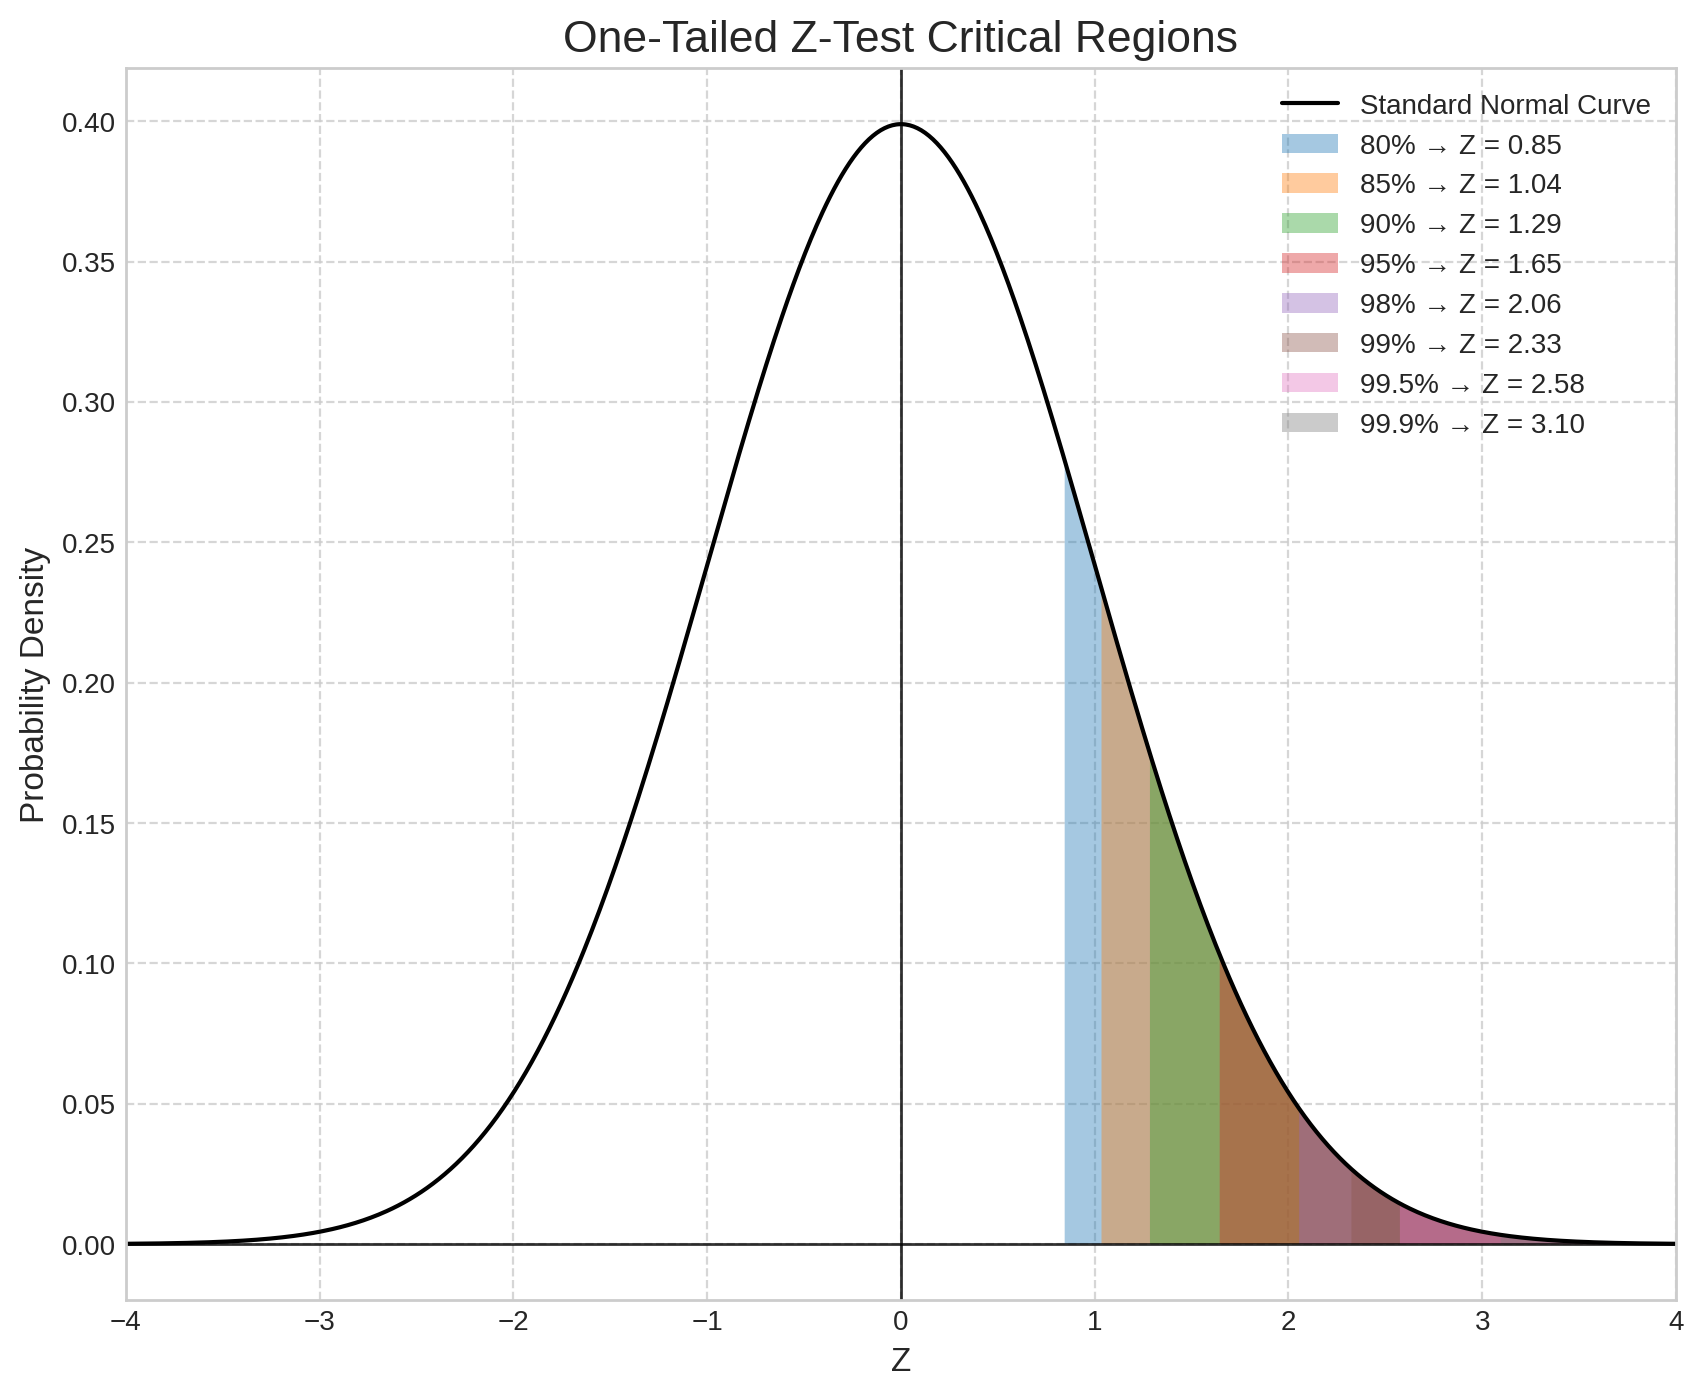

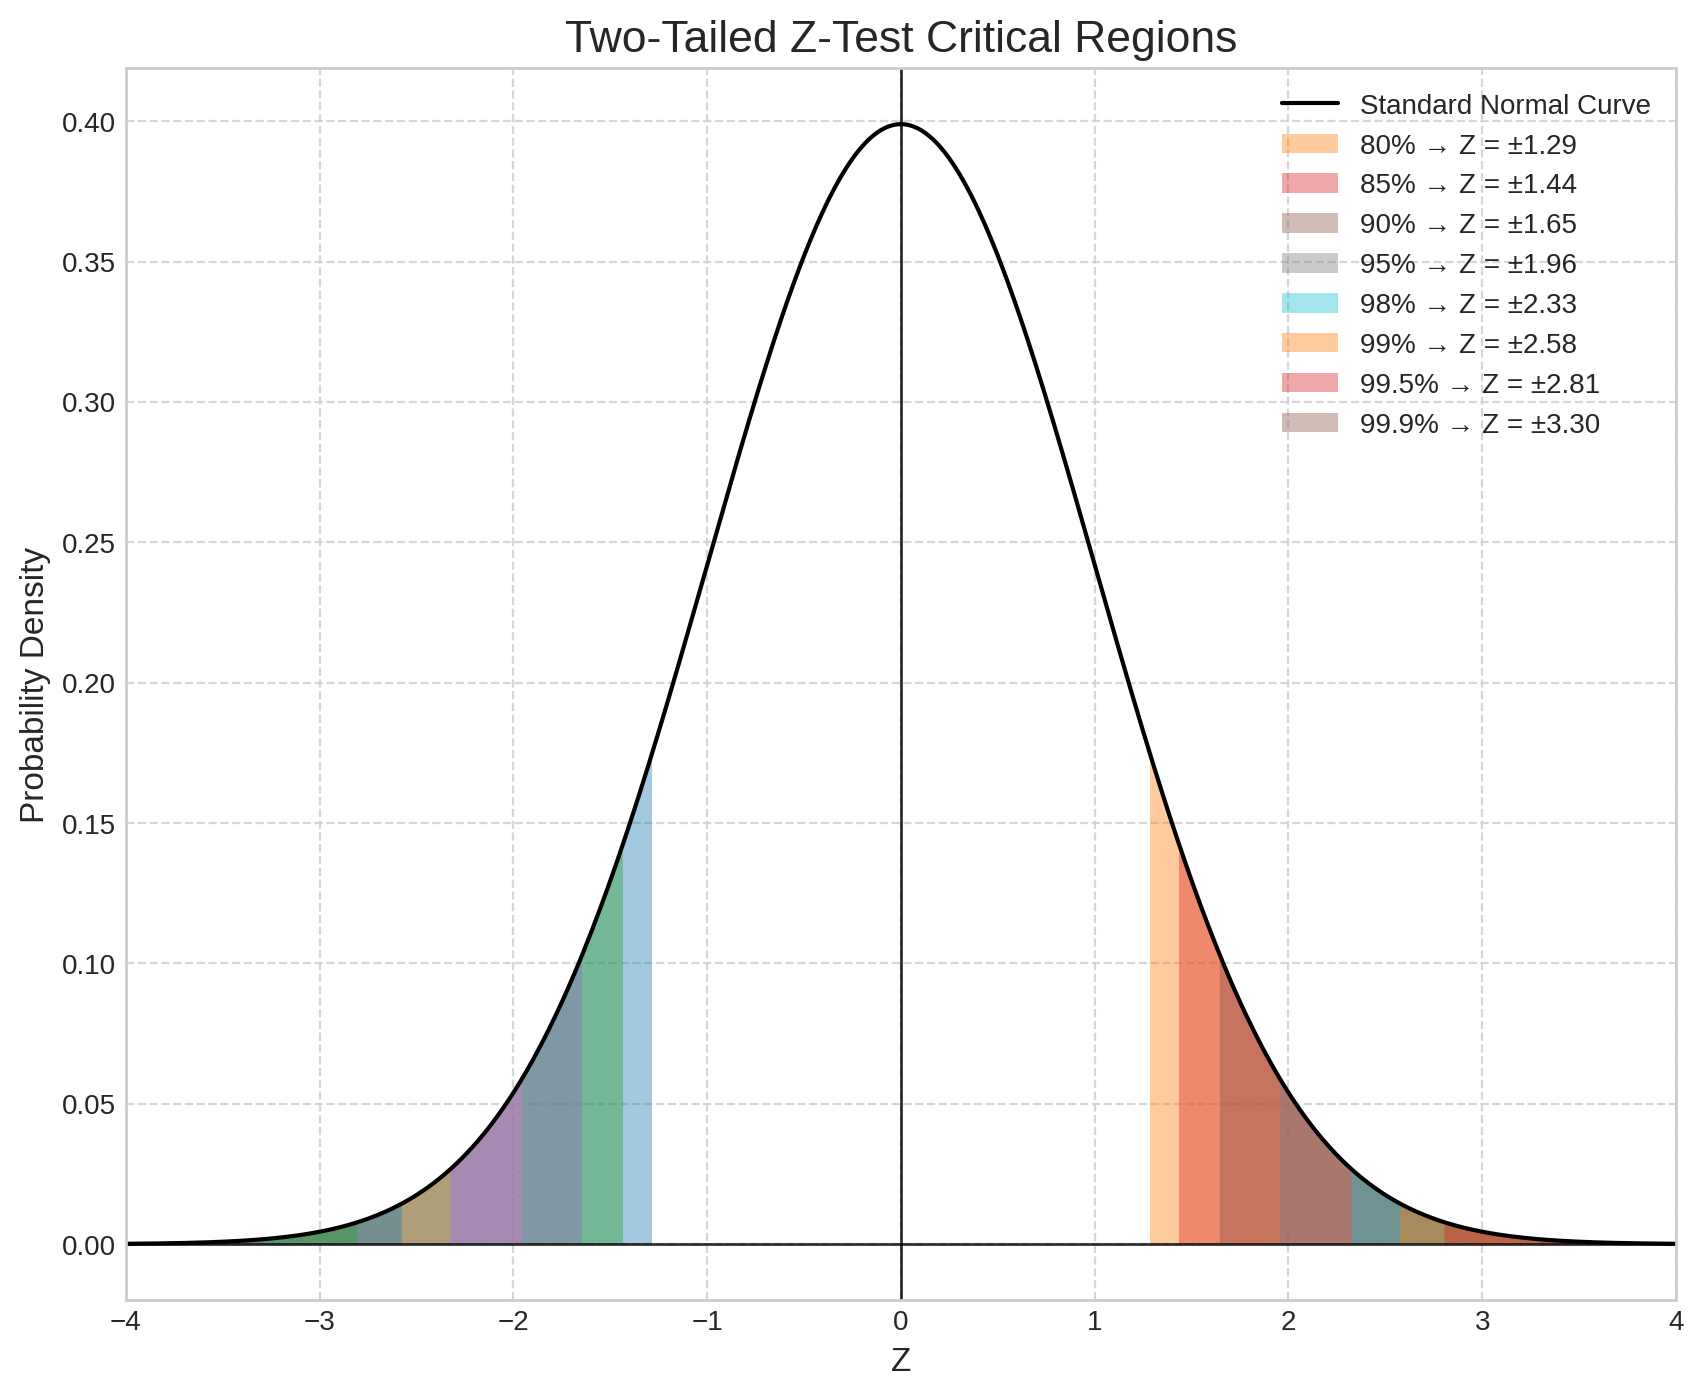

In [9]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=dpi)
ax.plot(x, y, label="Standard Normal Curve", color='black')

for cl, z in zip(confidence_levels, z_scores_for_one_tailed_test):
    ax.fill_between(x, y, where=(x >= z), alpha=0.4, label=f"{cl}% → Z = {z:.2f}")

plt.axhline(0, color='black', linewidth=1, alpha=0.8)
plt.axvline(0, color='black', linewidth=1, alpha=0.8)
ax.set_title("One-Tailed Z-Test Critical Regions", fontsize=16)
plt.xlim((-4, 4))
ax.set_xlabel("Z", fontsize=12)
ax.set_ylabel("Probability Density", fontsize=12)
ax.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()

fig, ax = plt.subplots(figsize=(10, 8), dpi=dpi)
ax.plot(x, y, label="Standard Normal Curve", color='black')

for cl, z in zip(confidence_levels, z_scores_for_two_tailed_test):
    ax.fill_between(x, y, where=(x <= -z), alpha=0.4)
    ax.fill_between(x, y, where=(x >= z), alpha=0.4, label=f"{cl}% → Z = ±{z:.2f}")
    
plt.axhline(0, color='black', linewidth=1, alpha=0.8)
plt.axvline(0, color='black', linewidth=1, alpha=0.8)
ax.set_title("Two-Tailed Z-Test Critical Regions", fontsize=16)
plt.xlim((-4, 4))
ax.set_xlabel("Z", fontsize=12)
ax.set_ylabel("Probability Density", fontsize=12)
ax.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()